# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratDisk))
library(svglite)
library(RColorBrewer)




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [2]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

In [3]:
#AvailableData()

# Read objects merged_unprocessed_db_filt_clustered_QCed

In [4]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")



In [5]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_reclustered.rds")

In [10]:
adata

An object of class Seurat 
101771 features across 35224 samples within 3 assays 
Active assay: SCT (28997 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

In [11]:
DefaultAssay(adata)<-'SCT'

In [12]:
genes<-Features(adata)

In [13]:
genes[grep("CD8", genes)]

[1] "CD84"     "CD8A"     "CD8B"     "CD8B2"    "CD80"     "CD86"    
 [7] "CD83"     "CD81-AS1" "CD81"     "CD82"

# Define marker genes

In [14]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [15]:
length(markers)

[1] 27

In [16]:
length(markers[which(markers%in%genes)])

[1] 27

# Read Alsinet cell typist prediction

In [17]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/")

In [18]:
cell_typist<-read.csv(file="Alsinet_celltypist_prediction.csv")

In [19]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [20]:
str(row.names(cell_typist))

 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [21]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [22]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [23]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	35224 obs. of  2 variables:
 $ predicted_labels: chr  "PrimitiveStreak" "iPSCs" "PrimitiveStreak" "iPSCs" ...
 $ conf_score      : num  0.00224 0.98688 0.03966 0.99956 0.97571 ...
 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [24]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Alsinet'
)

In [25]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Alsinet'
)

# Read FBMA cell typist prediction

In [26]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/")

In [27]:
cell_typist<-read.csv(file="FBMA_celltypist_prediction.csv")

In [28]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [29]:
str(row.names(cell_typist))

 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [30]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [31]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [32]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	35224 obs. of  2 variables:
 $ predicted_labels: chr  "pre pro B progenitor" "MEP" "pre pro B progenitor" "DC precursor" ...
 $ conf_score      : num  0.854 1 0.966 1 0.987 ...
 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [33]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_FBMA'
)

In [34]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_FBMA'
)

## WNN by CellTypist_label_FBMA

In [35]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/graphs/"

if(file.exists(path_graphs)){
    
}else{

    dir.create(path_graphs)
}

NULL

In [36]:
colnames(adata[[]])

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "nCount_RNA_raw"               
 [5] "nFeature_RNA_raw"              "percent.mt"                   
 [7] "scDblFinder.class"             "scDblFinder.score"            
 [9] "scDblFinder.weighted"          "scDblFinder.cxds_score"       
[11] "Diff"                          "nCount_SCT"                   
[13] "nFeature_SCT"                  "SCT_snn_res.2"                
[15] "seurat_clusters"               "SCT_snn_res.0.5"              
[17] "CellTypist_label_Alsinet"      "CellTypist_conf_score_Alsinet"
[19] "CellTypist_label_FBMA"         "CellTypist_conf_score_FBMA"

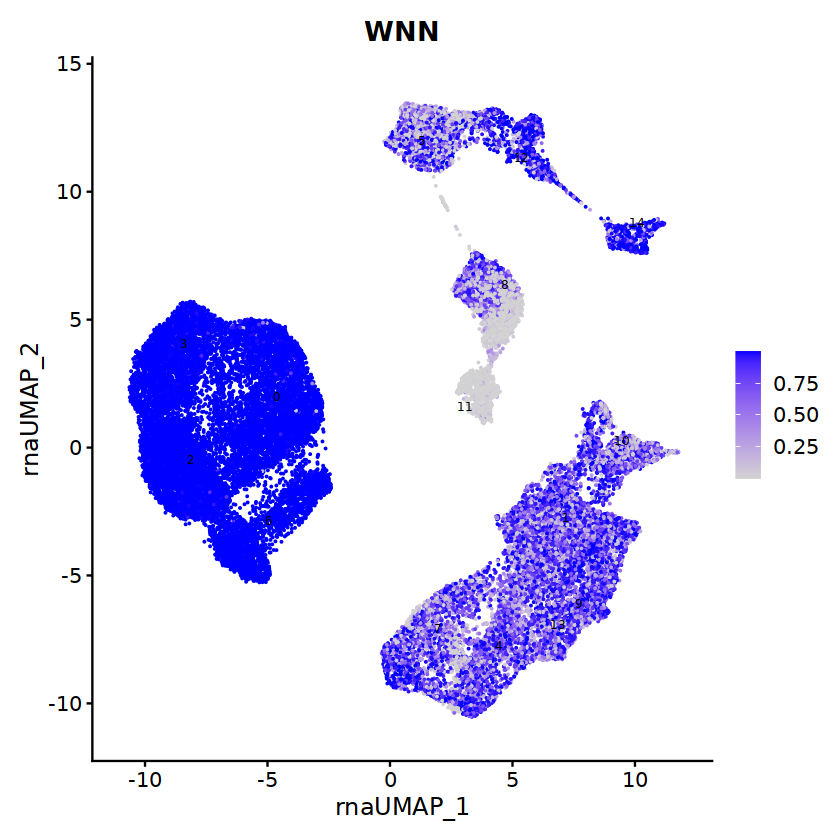

In [38]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.rna", 
              features = "CellTypist_conf_score_FBMA", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [39]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_FBMA.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

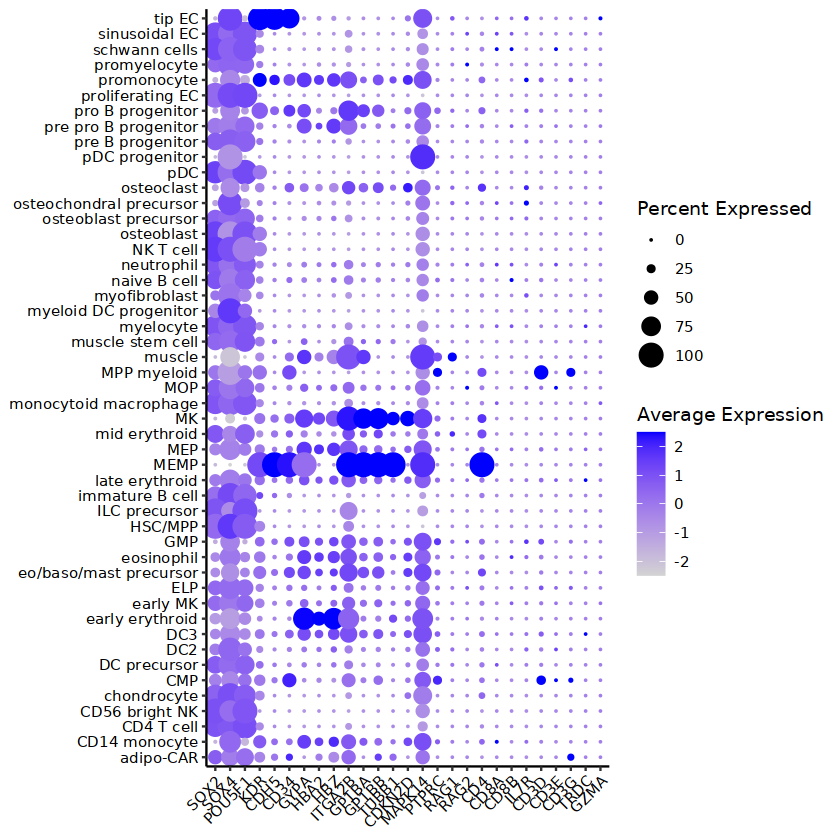

In [40]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_FBMA")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_FBMA.png', width =1000)
dotplot3
dev.off()

# Read Immune_ALL_low cell typist prediction

In [41]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/")

In [42]:
cell_typist<-read.csv(file="Immune_ALL_low_celltypist_prediction.csv")

In [43]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [44]:
str(row.names(cell_typist))

 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [45]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [46]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [47]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	35224 obs. of  2 variables:
 $ predicted_labels: chr  "Epithelial cells" "Epithelial cells" "Double-positive thymocytes" "Epithelial cells" ...
 $ conf_score      : num  0.1969 1 0.0652 1 1 ...
 chr [1:35224] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [48]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Immune_ALL_low'
)

In [49]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Immune_ALL_low'
)

## WNN by CellTypist_label_Immune_ALL_low

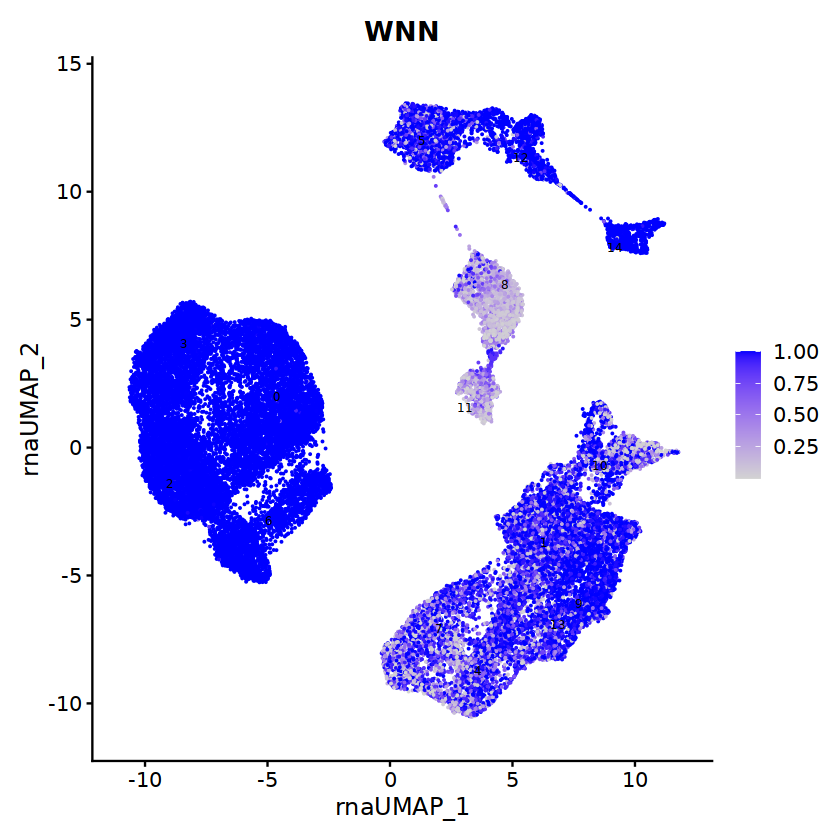

In [50]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.rna", 
              features = "CellTypist_conf_score_Immune_ALL_low", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [51]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_Immune_ALL_low.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

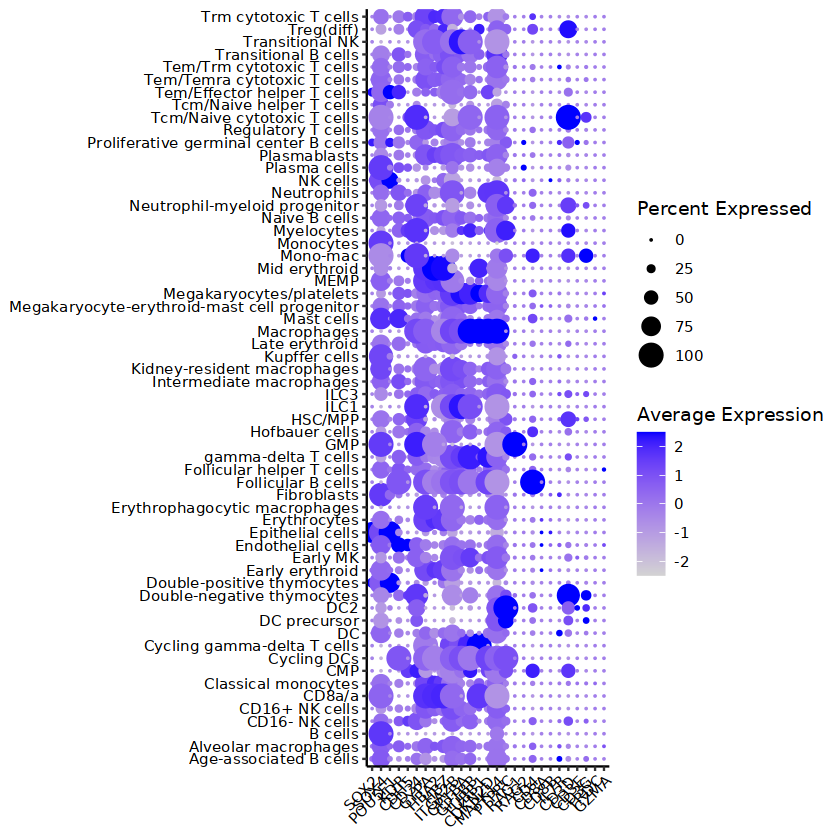

In [52]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_Immune_ALL_low")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_Immune_ALL_low.png', width =1000)
dotplot3
dev.off()

# Factor orig.ident

In [53]:
unique(adata@meta.data$orig.ident)

[1] "MCO_01373_3GEX" "MCO_01374_3GEX"

In [54]:
adata@meta.data$orig.ident<-factor(adata@meta.data$orig.ident,
                                                   levels=c('MCO_01373_3GEX','MCO_01374_3GEX'),
                                                   ordered=T)

# Analysis Alsinet

In [55]:
adata@meta.data$CellTypist_label_Alsinet<-factor(adata@meta.data$CellTypist_label_Alsinet,
                                                   levels=c('iPSCs',
                                                            'PrimitiveStreak',
                                                            'NeuralCrest',
                                                            'Endoderm',
                                                            'EmergentMesoderm',
                                                            'MesoEcto',
                                                            'AdvancedMesoderm',
                                                            'HemogenicEndothelium',
                                                            'ErythrocyteLineage',
                                                            'Megakaryocytes',
                                                            'EarlyFibroblasts',
                                                            'Fibroblasts',
                                                            'MyeloidProgenitors',
                                                            'Monocytes',
                                                            'Mono-DCprec',
                                                            'Macrophages',
                                                            'MastCells',
                                                            'NeutrophilMyeloidProgenitor'),
                                                   ordered=T)

## Barplot

In [56]:
met<-adata[[]]

In [57]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"

In [58]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_Alsinet",'orig.ident'))

In [59]:
#str(met.dt)

In [60]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [61]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [62]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [63]:
str(Freq.table)

'data.frame':	77 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 15 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ orig.ident              : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 1 1 1 1 1 1 2 2 2 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 1 4 2 6 3 5 11 1 2 8 ...
 $ Freq                    : int  3452 1 1933 2 1 102 57 1 2 1 ...
 $ TOTAL                   : int  5548 5548 5548 5548 5548 5548 5548 3 3 4297 ...
 $ Perc                    : num  62.22 0.02 34.84 0.04 0.02 ...


In [64]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3     931    2108    2284    2343    5548 

In [65]:
met.dt<-data.table(met, key=c("CellTypist_label_Alsinet"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_Alsinet=.N),by=key(met.dt)], stringsAsFactors=F)



In [66]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ CellTypist_label_Alsinet     : Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_CellTypist_label_Alsinet: int  10398 6322 201 6 467 385 605 997 2 14024 ...


### Filter x axis by frequency

In [67]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	74 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 15 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 11 ...
 $ orig.ident              : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 1 1 1 1 1 1 2 2 2 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 1 4 2 6 3 5 11 8 10 1 ...
 $ Freq                    : int  3452 1 1933 2 1 102 57 1 4296 11 ...
 $ TOTAL                   : int  5548 5548 5548 5548 5548 5548 5548 4297 4297 1540 ...
 $ Perc                    : num  62.22 0.02 34.84 0.04 0.02 ...


In [68]:
vector_colors_CellTypist_label_Alsinet<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_CellTypist_label_Alsinet)

[1] 22

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


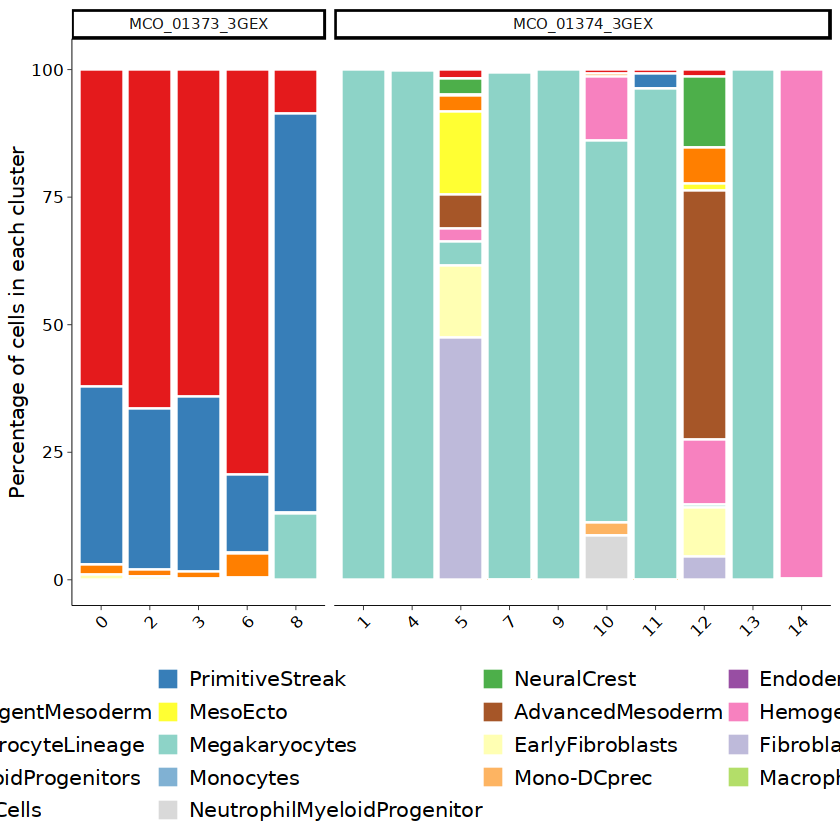

In [69]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_Alsinet)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_Alsinet,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))



stacked_barplot
  




  

In [70]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## WNN by CellTypist_label_Alsinet

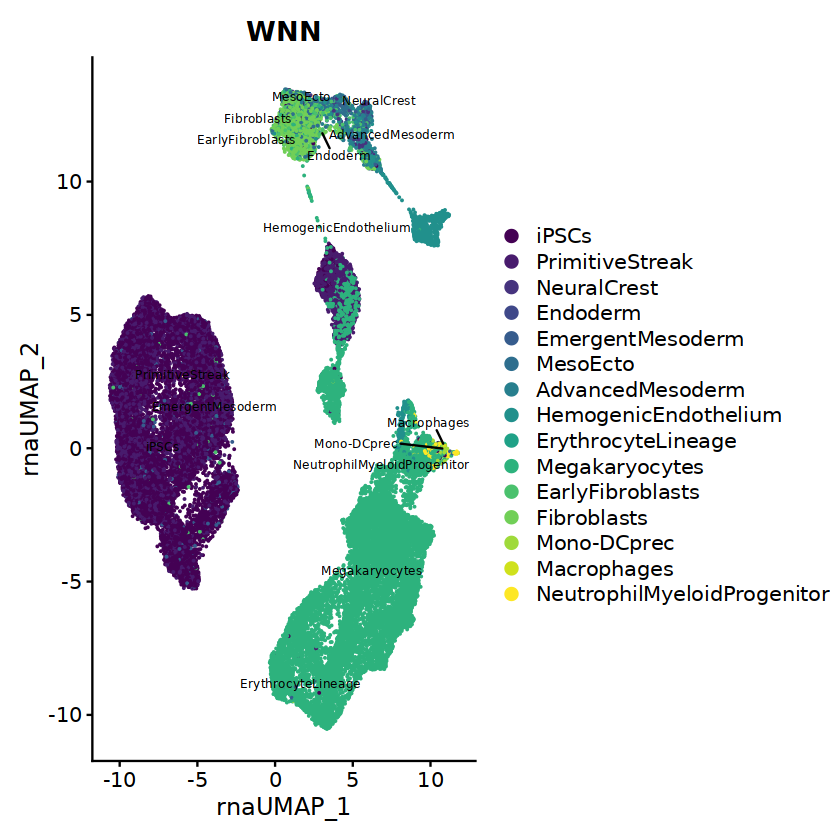

In [71]:
p3 <- DimPlot(adata, reduction = "umap.rna", group.by = "CellTypist_label_Alsinet", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3

In [72]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_CellTypist_label_Alsinet.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

# First iteration of integrated annotation

In [73]:
adata@meta.data$Integrated_annotation<-NA

## Decision #1 hESCs<-'iPSCs','PrimitiveStreak','NeuralCrest','Endoderm','EmergentMesoderm','MesoEcto'

In [74]:
indx.hESCs<-which(adata@meta.data$CellTypist_label_Alsinet%in%c('iPSCs','PrimitiveStreak','NeuralCrest','Endoderm','EmergentMesoderm','MesoEcto'))

str(indx.hESCs)

 int [1:17779] 1 2 3 4 5 6 7 8 9 10 ...


In [75]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #2 HemogenicEndothelium c('AdvancedMesoderm','HemogenicEndothelium')

In [76]:
indx.HemogenicEndothelium<-which(adata@meta.data$CellTypist_label_Alsinet%in%c('AdvancedMesoderm','HemogenicEndothelium'))

str(indx.HemogenicEndothelium)

 int [1:1602] 17298 17299 17306 17317 17333 17335 17341 17348 17356 17358 ...


In [77]:
adata@meta.data$Integrated_annotation[indx.HemogenicEndothelium]<-'HemogenicEndothelium'

# Analysis FBMA

In [78]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"

In [79]:
indx.new<-is.na(adata@meta.data$Integrated_annotation)

str(indx.new)

 logi [1:35224] FALSE FALSE FALSE FALSE FALSE FALSE ...


In [80]:
adata@meta.data$Integrated_annotation[indx.new]<-adata@meta.data$CellTypist_label_FBMA[indx.new]

In [81]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)


summary(adata@meta.data$Integrated_annotation)


levels(adata@meta.data$Integrated_annotation)


length(levels(adata@meta.data$Integrated_annotation))

adipo-CAR           CD14 monocyte              CD4 T cell 
                      2                      75                       1 
            chondrocyte                     CMP            DC precursor 
                      1                      87                      67 
                    DC2                     DC3         early erythroid 
                    123                    1234                    1642 
               early MK                     ELP  eo/baso/mast precursor 
                   1220                     204                      43 
             eosinophil                     GMP    HemogenicEndothelium 
                    104                     460                    1602 
                   hESC         immature B cell          late erythroid 
                  17779                       2                    2227 
                   MEMP                     MEP           mid erythroid 
                      1                    5759                       3 
                     MK   monocytoid macrophage                     MOP 
                    112                      26                      49 
            MPP myeloid                  muscle        muscle stem cell 
                      2                       4                       3 
              myelocyte   myeloid DC progenitor           myofibroblast 
                    188                       1                       7 
           naive B cell              neutrophil    osteoblast precursor 
                     24                     131                     264 
osteochondral precursor              osteoclast          pDC progenitor 
                    262                      25                       1 
       pre B progenitor    pre pro B progenitor        pro B progenitor 
                     18                    1349                      30 
            promonocyte            promyelocyte           schwann cells 
                     29                      25                       4 
          sinusoidal EC                  tip EC 
                      9                      25

[1] "adipo-CAR"               "CD14 monocyte"          
 [3] "CD4 T cell"              "chondrocyte"            
 [5] "CMP"                     "DC precursor"           
 [7] "DC2"                     "DC3"                    
 [9] "early erythroid"         "early MK"               
[11] "ELP"                     "eo/baso/mast precursor" 
[13] "eosinophil"              "GMP"                    
[15] "HemogenicEndothelium"    "hESC"                   
[17] "immature B cell"         "late erythroid"         
[19] "MEMP"                    "MEP"                    
[21] "mid erythroid"           "MK"                     
[23] "monocytoid macrophage"   "MOP"                    
[25] "MPP myeloid"             "muscle"                 
[27] "muscle stem cell"        "myelocyte"              
[29] "myeloid DC progenitor"   "myofibroblast"          
[31] "naive B cell"            "neutrophil"             
[33] "osteoblast precursor"    "osteochondral precursor"
[35] "osteoclast"              "pDC progenitor"         
[37] "pre B progenitor"        "pre pro B progenitor"   
[39] "pro B progenitor"        "promonocyte"            
[41] "promyelocyte"            "schwann cells"          
[43] "sinusoidal EC"           "tip EC"

[1] 44

In [82]:
adata@meta.data$Integrated_annotation<-as.character(adata@meta.data$Integrated_annotation)

## Decision #3 hESCs<-'promyelocyte','schwann cells'

In [83]:
indx.hESCs<-which(adata@meta.data$Integrated_annotation%in%c('promyelocyte','schwann cells'))

str(indx.hESCs)

 int [1:29] 17624 18059 18076 18457 18851 19894 20101 22177 22738 22890 ...


In [84]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #4 HemogenicEndothelium c('tip EC','sinusoidal EC')

In [85]:
indx.HemogenicEndothelium<-which(adata@meta.data$Integrated_annotation%in%c('tip EC','sinusoidal EC'))

str(indx.HemogenicEndothelium)

 int [1:34] 56 893 17405 18182 18450 18938 19155 19175 21392 23058 ...


In [86]:
adata@meta.data$Integrated_annotation[indx.HemogenicEndothelium]<-'HemogenicEndothelium'

## Decision #5 MEP c('DC3')

In [87]:
indx.MEP<-which(adata@meta.data$Integrated_annotation%in%c('DC3'))

str(indx.MEP)

 int [1:1234] 1484 6316 11271 15194 15231 16418 16665 17297 17307 17310 ...


In [88]:
adata@meta.data$Integrated_annotation[indx.MEP]<-'MEP'

In [89]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)


summary(adata@meta.data$Integrated_annotation)


levels(adata@meta.data$Integrated_annotation)


length(levels(adata@meta.data$Integrated_annotation))

adipo-CAR           CD14 monocyte              CD4 T cell 
                      2                      75                       1 
            chondrocyte                     CMP            DC precursor 
                      1                      87                      67 
                    DC2         early erythroid                early MK 
                    123                    1642                    1220 
                    ELP  eo/baso/mast precursor              eosinophil 
                    204                      43                     104 
                    GMP    HemogenicEndothelium                    hESC 
                    460                    1636                   17808 
        immature B cell          late erythroid                    MEMP 
                      2                    2227                       1 
                    MEP           mid erythroid                      MK 
                   6993                       3                     112 
  monocytoid macrophage                     MOP             MPP myeloid 
                     26                      49                       2 
                 muscle        muscle stem cell               myelocyte 
                      4                       3                     188 
  myeloid DC progenitor           myofibroblast            naive B cell 
                      1                       7                      24 
             neutrophil    osteoblast precursor osteochondral precursor 
                    131                     264                     262 
             osteoclast          pDC progenitor        pre B progenitor 
                     25                       1                      18 
   pre pro B progenitor        pro B progenitor             promonocyte 
                   1349                      30                      29

[1] "adipo-CAR"               "CD14 monocyte"          
 [3] "CD4 T cell"              "chondrocyte"            
 [5] "CMP"                     "DC precursor"           
 [7] "DC2"                     "early erythroid"        
 [9] "early MK"                "ELP"                    
[11] "eo/baso/mast precursor"  "eosinophil"             
[13] "GMP"                     "HemogenicEndothelium"   
[15] "hESC"                    "immature B cell"        
[17] "late erythroid"          "MEMP"                   
[19] "MEP"                     "mid erythroid"          
[21] "MK"                      "monocytoid macrophage"  
[23] "MOP"                     "MPP myeloid"            
[25] "muscle"                  "muscle stem cell"       
[27] "myelocyte"               "myeloid DC progenitor"  
[29] "myofibroblast"           "naive B cell"           
[31] "neutrophil"              "osteoblast precursor"   
[33] "osteochondral precursor" "osteoclast"             
[35] "pDC progenitor"          "pre B progenitor"       
[37] "pre pro B progenitor"    "pro B progenitor"       
[39] "promonocyte"

[1] 39

In [90]:
vector_colors<-rep(NA, length(levels(adata@meta.data$Integrated_annotation)))

str(vector_colors)

 logi [1:39] NA NA NA NA NA NA ...


In [91]:
vector_colors[c(1:14)]<-c(brewer.pal(9, "Set1")[c(1:2)],
                          brewer.pal(12, "Set3")[c(1:5)],
                          brewer.pal(9, "Set1")[c(3:9)])

str(vector_colors)

 chr [1:39] "#E41A1C" "#377EB8" "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" ...


In [92]:
names(vector_colors)[c(1:14)]<-c('hESC','HemogenicEndothelium','LMPP','MPP myeloid','CMP','GMP','ELP','MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [93]:
vector_colors[c(1:14)]

hESC HemogenicEndothelium                 LMPP 
           "#E41A1C"            "#377EB8"            "#8DD3C7" 
         MPP myeloid                  CMP                  GMP 
           "#FFFFB3"            "#BEBADA"            "#FB8072" 
                 ELP                  MEP      early erythroid 
           "#80B1D3"            "#4DAF4A"            "#984EA3" 
       mid erythroid       late erythroid erythroid macrophage 
           "#FF7F00"            "#FFFF33"            "#A65628" 
            early MK                   MK 
           "#F781BF"            "#999999"

In [94]:
monolineage<-c('MOP','promonocyte','CD14 monocyte','monocytoid macrophage','stromal macrophage','DC precursor','DC1','DC2','pDC','tDC','neutrophil','basophil','eo/baso/mast precursor','eosinophil','mast cell')

str(monolineage)

 chr [1:15] "MOP" "promonocyte" "CD14 monocyte" "monocytoid macrophage" ...


In [95]:
names(vector_colors)[c(15:29)]<-monolineage

In [96]:
vector_colors[c(15:23)]<-brewer.pal(9, "Greens")

vector_colors[c(24:29)]<-brewer.pal(6, "Blues")

In [97]:
vector_colors[c(1:29)]

hESC   HemogenicEndothelium                   LMPP 
             "#E41A1C"              "#377EB8"              "#8DD3C7" 
           MPP myeloid                    CMP                    GMP 
             "#FFFFB3"              "#BEBADA"              "#FB8072" 
                   ELP                    MEP        early erythroid 
             "#80B1D3"              "#4DAF4A"              "#984EA3" 
         mid erythroid         late erythroid   erythroid macrophage 
             "#FF7F00"              "#FFFF33"              "#A65628" 
              early MK                     MK                    MOP 
             "#F781BF"              "#999999"              "#F7FCF5" 
           promonocyte          CD14 monocyte  monocytoid macrophage 
             "#E5F5E0"              "#C7E9C0"              "#A1D99B" 
    stromal macrophage           DC precursor                    DC1 
             "#74C476"              "#41AB5D"              "#238B45" 
                   DC2                    pDC                    tDC 
             "#006D2C"              "#00441B"              "#EFF3FF" 
            neutrophil               basophil eo/baso/mast precursor 
             "#C6DBEF"              "#9ECAE1"              "#6BAED6" 
            eosinophil              mast cell 
             "#3182BD"              "#08519C"

In [98]:
lymphoid_lineage<-c('immature B cell','pre B progenitor','pre pro B progenitor','pro B progenitor','naive B cell','CD4 T cell','CD8 T cell','ILC precursor','Treg')

str(lymphoid_lineage)

 chr [1:9] "immature B cell" "pre B progenitor" "pre pro B progenitor" ...


In [99]:
lymphoid_lineage

[1] "immature B cell"      "pre B progenitor"     "pre pro B progenitor"
[4] "pro B progenitor"     "naive B cell"         "CD4 T cell"          
[7] "CD8 T cell"           "ILC precursor"        "Treg"

In [100]:
names(vector_colors)[c(30:38)]<-lymphoid_lineage

In [101]:
vector_colors[c(30:38)]<-brewer.pal(9, "Reds")


In [105]:
NK.lineage<-c('NK progenitor','NK T cell','CD56 bright NK','mature NK')

str(NK.lineage)

 chr [1:4] "NK progenitor" "NK T cell" "CD56 bright NK" "mature NK"


In [108]:
str(vector_colors)
str(names(vector_colors)[c(39:42)])

 Named chr [1:42] "#E41A1C" "#377EB8" "#8DD3C7" "#FFFFB3" "#BEBADA" ...
 - attr(*, "names")= chr [1:42] "hESC" "HemogenicEndothelium" "LMPP" "MPP myeloid" ...
 chr [1:4] NA "" "" ""


In [109]:
names(vector_colors)[c(39:42)]<-NK.lineage

In [110]:
vector_colors[c(39:42)]<-brewer.pal(9, "Oranges")[c(4:7)]

In [111]:
vector_colors[c(1:42)]

hESC   HemogenicEndothelium                   LMPP 
             "#E41A1C"              "#377EB8"              "#8DD3C7" 
           MPP myeloid                    CMP                    GMP 
             "#FFFFB3"              "#BEBADA"              "#FB8072" 
                   ELP                    MEP        early erythroid 
             "#80B1D3"              "#4DAF4A"              "#984EA3" 
         mid erythroid         late erythroid   erythroid macrophage 
             "#FF7F00"              "#FFFF33"              "#A65628" 
              early MK                     MK                    MOP 
             "#F781BF"              "#999999"              "#F7FCF5" 
           promonocyte          CD14 monocyte  monocytoid macrophage 
             "#E5F5E0"              "#C7E9C0"              "#A1D99B" 
    stromal macrophage           DC precursor                    DC1 
             "#74C476"              "#41AB5D"              "#238B45" 
                   DC2                    pDC                    tDC 
             "#006D2C"              "#00441B"              "#EFF3FF" 
            neutrophil               basophil eo/baso/mast precursor 
             "#C6DBEF"              "#9ECAE1"              "#6BAED6" 
            eosinophil              mast cell        immature B cell 
             "#3182BD"              "#08519C"              "#FFF5F0" 
      pre B progenitor   pre pro B progenitor       pro B progenitor 
             "#FEE0D2"              "#FCBBA1"              "#FC9272" 
          naive B cell             CD4 T cell             CD8 T cell 
             "#FB6A4A"              "#EF3B2C"              "#CB181D" 
         ILC precursor                   Treg          NK progenitor 
             "#A50F15"              "#67000D"              "#FDAE6B" 
             NK T cell         CD56 bright NK              mature NK 
             "#FD8D3C"              "#F16913"              "#D94801"

In [124]:
str(vector_colors)

 Named chr [1:53] "#E41A1C" "#377EB8" "#8DD3C7" "#FFFFB3" "#BEBADA" ...
 - attr(*, "names")= chr [1:53] "hESC" "HemogenicEndothelium" "LMPP" "MPP myeloid" ...


In [125]:
rest<-c('myelocyte','osteoblast','osteoblast precursor','osteochondral precursor','osteoclast','adipo-CAR','arteriolar fibroblast','early osteoblast','myofibroblast','muscle','muscle stem cell')

In [126]:
names(vector_colors)[c(43:53)]<-rest

In [127]:
vector_colors[c(43:53)]<-c(brewer.pal(9, "Greys"),brewer.pal(9, "Greys")[c(5:6)])

In [128]:
which(levels(adata@meta.data$Integrated_annotation) == "NA")


integer(0)

In [129]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation,
                                                   levels=names(vector_colors),
                                                   ordered=T)

## Remove unused cell levels

In [150]:
# 1. Identify all annotations with more than 0 cells
valid_annotations <- names(table(adata@meta.data$Integrated_annotation)[table(adata@meta.data$Integrated_annotation) > 0])

# 2. Subset the Seurat object to keep only cells belonging to these valid groups
# This ensures all assays are synchronized and factor levels are clean
adata_subset <- subset(adata, subset = Integrated_annotation %in% valid_annotations)

# 3. Double-check the metadata levels are dropped (good practice)
adata_subset@meta.data$Integrated_annotation <- droplevels(adata_subset@meta.data$Integrated_annotation)


Warning message:
"Removing 4 cells missing data for vars requested"


## Barplot

In [151]:
met<-adata_subset[[]]

In [152]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"

In [153]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [154]:
#str(met.dt)

In [155]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [156]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [157]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [158]:
str(Freq.table)

'data.frame':	249 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation: Ord.factor w/ 35 levels "hESC"<"HemogenicEndothelium"<..: 1 29 2 4 6 7 10 11 16 19 ...
 $ Freq                 : int  5491 2 1 1 3 11 4 15 2 2 ...
 $ TOTAL                : int  5548 5548 5548 5548 5548 5548 5548 5548 5548 5548 ...
 $ Perc                 : num  98.97 0.04 0.02 0.02 0.05 ...


In [159]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3    1540    2108    2331    2343    5548 

In [160]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [161]:
str(Freq.table_CT_annotation)

'data.frame':	35 obs. of  2 variables:
 $ Integrated_annotation     : Ord.factor w/ 35 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  17808 1636 2 87 460 204 6993 1642 3 2227 ...


### Filter x axis by frequency

In [162]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	243 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation: Ord.factor w/ 35 levels "hESC"<"HemogenicEndothelium"<..: 1 29 2 4 6 7 10 11 16 19 ...
 $ Freq                 : int  5491 2 1 1 3 11 4 15 2 2 ...
 $ TOTAL                : int  5548 5548 5548 5548 5548 5548 5548 5548 5548 5548 ...
 $ Perc                 : num  98.97 0.04 0.02 0.02 0.05 ...


-------------------------------------->	0 25 50 75 100


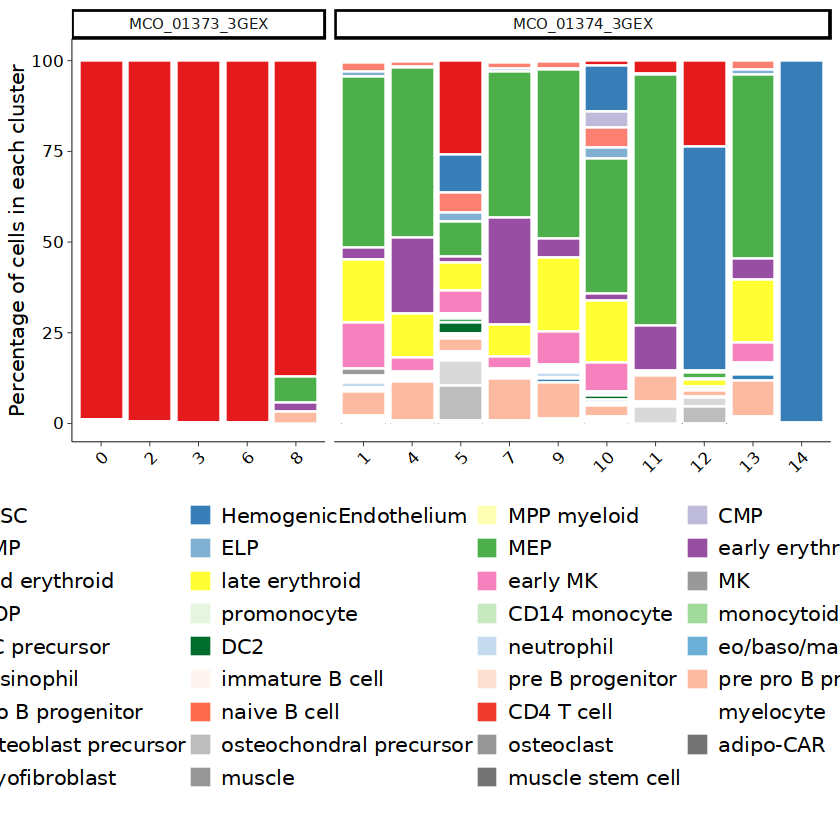

In [164]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Integrated_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors,
                      drop=T,
                      name="Integrated Annot")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=10,byrow=TRUE))



stacked_barplot
  




  

In [165]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_FBMA_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Dotplot

In [166]:
print(table(adata_subset@meta.data$Integrated_annotation))



                   hESC    HemogenicEndothelium             MPP myeloid 
                  17808                    1636                       2 
                    CMP                     GMP                     ELP 
                     87                     460                     204 
                    MEP         early erythroid           mid erythroid 
                   6993                    1642                       3 
         late erythroid                early MK                      MK 
                   2227                    1220                     112 
                    MOP             promonocyte           CD14 monocyte 
                     49                      29                      75 
  monocytoid macrophage            DC precursor                     DC2 
                     26                      67                     123 
             neutrophil  eo/baso/mast precursor              eosinophil 
                    131                      43   

In [167]:
# 2. Check the dimensions of the SCT assay (to ensure it has cells)
print(dim(adata_subset[['SCT']]))

[1] 28997 35220


In [168]:
markers

[1] "SOX2"   "SOX4"   "POU5F1" "KDR"    "CDH5"   "CD34"   "GYPA"   "HBA2"  
 [9] "HBZ"    "ITGA2B" "GP1BA"  "GP1BB"  "TUBB1"  "CDKN2D" "MAPK14" "PTPRC" 
[17] "RAG1"   "RAG2"   "CD4"    "CD8A"   "CD8B"   "IL7R"   "CD3D"   "CD3E"  
[25] "CD3G"   "TRDC"   "GZMA"

png 
  2

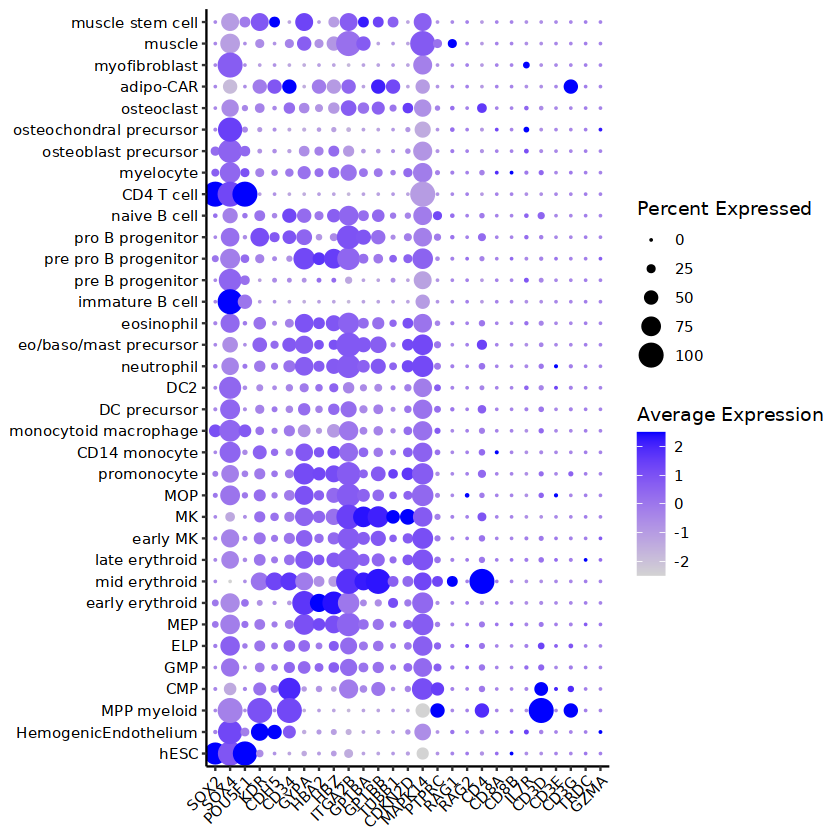

In [169]:
dotplot3<-DotPlot(
  adata_subset,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_one.png', width =1000)
dotplot3
dev.off()

# New round of decisions

In [250]:
adata_subset@meta.data$Integrated_annotation<-as.character(adata_subset@meta.data$Integrated_annotation)

## Decision #6 hESCs<- clusters('0','2','3','6','8')

In [251]:
indx.hESCs<-which(adata_subset@meta.data$seurat_clusters%in%c('0','2','3','6','8'))

str(indx.hESCs)

 int [1:17352] 1 2 3 4 5 6 7 8 9 10 ...


In [252]:
adata_subset@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #7 From FBMA keep: c('MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [253]:
indx.keep<-which(adata_subset@meta.data$Integrated_annotation%in%c('hESC','HemogenicEndothelium','MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK'))

str(indx.keep)

 int [1:33056] 1 2 3 4 5 6 7 8 9 10 ...


In [254]:
adata_subset@meta.data$Integrated_annotation[-indx.keep]<-NA

In [255]:
summary(as.factor(adata_subset@meta.data$Integrated_annotation))

early erythroid             early MK HemogenicEndothelium 
                2286                 1205                 1634 
                hESC       late erythroid                  MEP 
               18224                 2219                 7348 
                  MK                 NA's 
                 140                 2164

# Analysis ImmuneALL

In [183]:
str(adata_subset@meta.data$Integrated_annotation)

 Ord.factor w/ 35 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...


In [184]:
adata_subset@meta.data$Integrated_annotation<-as.character(adata_subset@meta.data$Integrated_annotation)

In [185]:
indx.NA<-which(is.na(adata_subset@meta.data$Integrated_annotation))

str(indx.NA)


 int [1:3445] 17308 17315 17318 17320 17322 17324 17328 17334 17338 17351 ...


In [186]:
adata_subset@meta.data$Integrated_annotation[indx.NA]<-adata_subset@meta.data$CellTypist_label_Immune_ALL_low[indx.NA]

In [187]:
adata_subset@meta.data$Integrated_annotation<-factor(adata_subset@meta.data$Integrated_annotation)


summary(adata_subset@meta.data$Integrated_annotation)


levels(adata_subset@meta.data$Integrated_annotation)


length(levels(adata_subset@meta.data$Integrated_annotation))

Age-associated B cells 
                                           5 
                        Alveolar macrophages 
                                          50 
                                     B cells 
                                           2 
                              CD16- NK cells 
                                          10 
                              CD16+ NK cells 
                                           1 
                         Classical monocytes 
                                          54 
                                         CMP 
                                           1 
                                          DC 
                                           4 
                                DC precursor 
                                           4 
                                         DC2 
                                           6 
                  Double-negative thymocytes 
                                           8 
                  Double-positive thymocytes 
                                          30 
                             early erythroid 
                                        1590 
                             Early erythroid 
                                         421 
                                    early MK 
                                        1205 
                                    Early MK 
                                          14 
                           Endothelial cells 
                                         436 
                            Epithelial cells 
                                         842 
                                Erythrocytes 
                                         275 
                                 Fibroblasts 
                                         270 
                   Follicular helper T cells 
                                           8 
                         gamma-delta T cells 
                                           1 
                        HemogenicEndothelium 
                                        1634 
                                        hESC 
                                       18224 
                              Hofbauer cells 
                                           4 
                                     HSC/MPP 
                                          45 
                                        ILC3 
                                          19 
                    Intermediate macrophages 
                                          60 
                 Kidney-resident macrophages 
                                           1 
                               Kupffer cells 
                                          14 
                              late erythroid 
                                        2219 
                                  Mast cells 
                                          13 
Megakaryocyte-erythroid-mast cell progenitor 
                                         571 
                    Megakaryocytes/platelets 
                                          28 
                                        MEMP 
                                           8 
                                         MEP 
                                        6777 
                               mid erythroid 
                                           3 
                               Mid erythroid 
                                           3 
                                          MK 
                                         112 
                                  Myelocytes 
                                           3 
                               Naive B cells 
                                          34 
               Neutrophil-myeloid progenitor 
                                          37 
                                 Neutrophils 
                                           1 
                                    NK cells 
                    

[1] "Age-associated B cells"                      
 [2] "Alveolar macrophages"                        
 [3] "B cells"                                     
 [4] "CD16- NK cells"                              
 [5] "CD16+ NK cells"                              
 [6] "Classical monocytes"                         
 [7] "CMP"                                         
 [8] "DC"                                          
 [9] "DC precursor"                                
[10] "DC2"                                         
[11] "Double-negative thymocytes"                  
[12] "Double-positive thymocytes"                  
[13] "early erythroid"                             
[14] "Early erythroid"                             
[15] "early MK"                                    
[16] "Early MK"                                    
[17] "Endothelial cells"                           
[18] "Epithelial cells"                            
[19] "Erythrocytes"                                
[20] "Fibroblasts"                                 
[21] "Follicular helper T cells"                   
[22] "gamma-delta T cells"                         
[23] "HemogenicEndothelium"                        
[24] "hESC"                                        
[25] "Hofbauer cells"                              
[26] "HSC/MPP"                                     
[27] "ILC3"                                        
[28] "Intermediate macrophages"                    
[29] "Kidney-resident macrophages"                 
[30] "Kupffer cells"                               
[31] "late erythroid"                              
[32] "Mast cells"                                  
[33] "Megakaryocyte-erythroid-mast cell progenitor"
[34] "Megakaryocytes/platelets"                    
[35] "MEMP"                                        
[36] "MEP"                                         
[37] "mid erythroid"                               
[38] "Mid erythroid"                               
[39] "MK"                                          
[40] "Myelocytes"                                  
[41] "Naive B cells"                               
[42] "Neutrophil-myeloid progenitor"               
[43] "Neutrophils"                                 
[44] "NK cells"                                    
[45] "Plasma cells"                                
[46] "Plasmablasts"                                
[47] "Proliferative germinal center B cells"       
[48] "Regulatory T cells"                          
[49] "Tcm/Naive helper T cells"                    
[50] "Tem/Temra cytotoxic T cells"                 
[51] "Tem/Trm cytotoxic T cells"                   
[52] "Transitional B cells"                        
[53] "Treg(diff)"                                  
[54] "Trm cytotoxic T cells"

[1] 54

## Barplot

In [188]:
met<-adata_subset[[]]

In [189]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"

In [190]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [191]:
#str(met.dt)

In [192]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [193]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [194]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [195]:
str(Freq.table)

'data.frame':	232 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Integrated_annotation: Factor w/ 54 levels "Age-associated B cells",..: 24 24 1 2 4 5 6 12 13 14 ...
 $ Freq                 : int  5548 3 1 18 3 1 7 2 140 51 ...
 $ TOTAL                : int  5548 3 4296 4296 4296 4296 4296 4296 4296 4296 ...
 $ Perc                 : num  100 100 0.02 0.42 0.07 0.02 0.16 0.05 3.26 1.19 ...


In [196]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3    1540    2108    2161    2343    5548 

In [197]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [198]:
str(Freq.table_CT_annotation)

'data.frame':	54 obs. of  2 variables:
 $ Integrated_annotation     : Factor w/ 54 levels "Age-associated B cells",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  5 50 2 10 1 54 1 4 4 6 ...


### Filter x axis by frequency

In [199]:
Freq.table_filtered<-Freq.table[which(Freq.table$Freq >= 100),]


str(Freq.table_filtered)

'data.frame':	43 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 2 2 2 2 2 2 11 11 11 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Integrated_annotation: Factor w/ 54 levels "Age-associated B cells",..: 24 13 15 17 31 33 36 15 23 31 ...
 $ Freq                 : int  5548 140 547 131 744 273 2020 120 192 265 ...
 $ TOTAL                : int  5548 4296 4296 4296 4296 4296 4296 1540 1540 1540 ...
 $ Perc                 : num  100 3.26 12.73 3.05 17.32 ...


In [200]:
remaining_levels<-levels(droplevels(Freq.table_filtered$Integrated_annotation))

str(remaining_levels)

 chr [1:11] "early erythroid" "Early erythroid" "early MK" ...


In [201]:
remaining_levels

[1] "early erythroid"                             
 [2] "Early erythroid"                             
 [3] "early MK"                                    
 [4] "Endothelial cells"                           
 [5] "Epithelial cells"                            
 [6] "Fibroblasts"                                 
 [7] "HemogenicEndothelium"                        
 [8] "hESC"                                        
 [9] "late erythroid"                              
[10] "Megakaryocyte-erythroid-mast cell progenitor"
[11] "MEP"

# Unassign low frequent cell types

In [202]:
adata_subset@meta.data$Integrated_annotation<-as.character(adata_subset@meta.data$Integrated_annotation)

In [203]:
indx.keep<-which(adata_subset@meta.data$Integrated_annotation%in%c('CD16- NK cells','Classical monocytes','Double-negative thymocytes','early erythroid','Early erythroid','early MK','Epithelial cells','Erythrocytes','Fibroblasts','gamma-delta T cells','HemogenicEndothelium','hESC','ILC3','late erythroid','Mast cells','Megakaryocyte-erythroid-mast cell progenitor','Megakaryocytes/platelets','MEP','MK','NK cells','Plasmablasts','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells'))

str(indx.keep)

 int [1:34413] 1 2 3 4 5 6 7 8 9 10 ...


In [204]:
adata_subset@meta.data$Integrated_annotation[-indx.keep]<-'unassigned'

In [205]:
adata_subset@meta.data$Integrated_annotation<-factor(adata_subset@meta.data$Integrated_annotation,
                                              c('hESC','HemogenicEndothelium','MEP','Megakaryocyte-erythroid-mast cell progenitor','early erythroid','Early erythroid','late erythroid','Erythrocytes','early MK','MK','Megakaryocytes/platelets',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                          
                                                'Epithelial cells',
                                                'Fibroblasts',
                                               'unassigned'),
                                              ordered=T)

In [206]:
levels(droplevels(adata_subset@meta.data$Integrated_annotation))

[1] "hESC"                                        
 [2] "HemogenicEndothelium"                        
 [3] "MEP"                                         
 [4] "Megakaryocyte-erythroid-mast cell progenitor"
 [5] "early erythroid"                             
 [6] "Early erythroid"                             
 [7] "late erythroid"                              
 [8] "Erythrocytes"                                
 [9] "early MK"                                    
[10] "MK"                                          
[11] "Megakaryocytes/platelets"                    
[12] "Classical monocytes"                         
[13] "Mast cells"                                  
[14] "Double-negative thymocytes"                  
[15] "gamma-delta T cells"                         
[16] "ILC3"                                        
[17] "Regulatory T cells"                          
[18] "CD16- NK cells"                              
[19] "NK cells"                                    
[20] "Plasmablasts"                                
[21] "Epithelial cells"                            
[22] "Fibroblasts"                                 
[23] "unassigned"

In [207]:
levels(adata_subset@meta.data$Integrated_annotation)

[1] "hESC"                                        
 [2] "HemogenicEndothelium"                        
 [3] "MEP"                                         
 [4] "Megakaryocyte-erythroid-mast cell progenitor"
 [5] "early erythroid"                             
 [6] "Early erythroid"                             
 [7] "late erythroid"                              
 [8] "Erythrocytes"                                
 [9] "early MK"                                    
[10] "MK"                                          
[11] "Megakaryocytes/platelets"                    
[12] "Classical monocytes"                         
[13] "Mast cells"                                  
[14] "Double-negative thymocytes"                  
[15] "gamma-delta T cells"                         
[16] "ILC3"                                        
[17] "Regulatory T cells"                          
[18] "Tem/Effector helper T cells"                 
[19] "Type 17 helper T cells"                      
[20] "CD16- NK cells"                              
[21] "NK cells"                                    
[22] "Plasmablasts"                                
[23] "Epithelial cells"                            
[24] "Fibroblasts"                                 
[25] "unassigned"

## New vector colors

In [208]:
vector_colors<-rep(NA, length(levels(adata_subset@meta.data$Integrated_annotation)))

str(vector_colors)

 logi [1:25] NA NA NA NA NA NA ...


In [209]:
vector_colors[c(1:11)]<-brewer.pal(11, "Set3")

str(vector_colors)

 chr [1:25] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" ...


In [210]:
names(vector_colors)[c(1:11)]<-levels(adata_subset@meta.data$Integrated_annotation)[c(1:11)]

In [211]:
monolineage<-c('Classical monocytes','Mast cells')

str(monolineage)

 chr [1:2] "Classical monocytes" "Mast cells"


In [212]:
names(vector_colors)[c(12:13)]<-monolineage

In [213]:
vector_colors[c(12:13)]<-brewer.pal(9, "Greens")[c(5:6)]



In [214]:
vector_colors[c(1:13)]

hESC 
                                   "#8DD3C7" 
                        HemogenicEndothelium 
                                   "#FFFFB3" 
                                         MEP 
                                   "#BEBADA" 
Megakaryocyte-erythroid-mast cell progenitor 
                                   "#FB8072" 
                             early erythroid 
                                   "#80B1D3" 
                             Early erythroid 
                                   "#FDB462" 
                              late erythroid 
                                   "#B3DE69" 
                                Erythrocytes 
                                   "#FCCDE5" 
                                    early MK 
                                   "#D9D9D9" 
                                          MK 
                                   "#BC80BD" 
                    Megakaryocytes/platelets 
                                   "#CCEBC5" 
                         Classical monocytes 
                                   "#74C476" 
                                  Mast cells 
                                   "#41AB5D"

In [215]:
lymphoid_lineage<-c('Double-negative thymocytes','gamma-delta T cells','ILC3','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells','CD16- NK cells','NK cells','Plasmablasts')

str(lymphoid_lineage)

 chr [1:9] "Double-negative thymocytes" "gamma-delta T cells" "ILC3" ...


In [216]:
names(vector_colors)[c(14:22)]<-lymphoid_lineage

In [217]:
vector_colors[c(14:22)]<-c(brewer.pal(9, "Purples")[c(4:9)],brewer.pal(9, "Reds")[c(5:7)])


In [218]:
vector_colors[c(1:25)]

hESC 
                                   "#8DD3C7" 
                        HemogenicEndothelium 
                                   "#FFFFB3" 
                                         MEP 
                                   "#BEBADA" 
Megakaryocyte-erythroid-mast cell progenitor 
                                   "#FB8072" 
                             early erythroid 
                                   "#80B1D3" 
                             Early erythroid 
                                   "#FDB462" 
                              late erythroid 
                                   "#B3DE69" 
                                Erythrocytes 
                                   "#FCCDE5" 
                                    early MK 
                                   "#D9D9D9" 
                                          MK 
                                   "#BC80BD" 
                    Megakaryocytes/platelets 
                                   "#CCEBC5" 
                         Classical monocytes 
                                   "#74C476" 
                                  Mast cells 
                                   "#41AB5D" 
                  Double-negative thymocytes 
                                   "#BCBDDC" 
                         gamma-delta T cells 
                                   "#9E9AC8" 
                                        ILC3 
                                   "#807DBA" 
                          Regulatory T cells 
                                   "#6A51A3" 
                 Tem/Effector helper T cells 
                                   "#54278F" 
                      Type 17 helper T cells 
                                   "#3F007D" 
                              CD16- NK cells 
                                   "#FB6A4A" 
                                    NK cells 
                                   "#EF3B2C" 
                                Plasmablasts 
                                   "#CB181D" 
                                        <NA> 
                                          NA 
                                        <NA> 
                                          NA 
                                        <NA> 
                                          NA

In [219]:
rest<-c('Epithelial cells','Fibroblasts','unassigned')

In [220]:
names(vector_colors)[c(23:25)]<-rest

In [221]:
vector_colors[c(23:25)]<-brewer.pal(9, "Greys")[c(4:5,1)]

## Barplot

In [222]:
met<-adata_subset[[]]

In [223]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"

In [224]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [225]:
#str(met.dt)

In [226]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [227]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [228]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [229]:
str(Freq.table)

'data.frame':	147 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Integrated_annotation: Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 1 2 3 4 5 6 7 8 9 ...
 $ Freq                 : int  5548 3 5 2020 273 140 51 744 53 547 ...
 $ TOTAL                : int  5548 3 4296 4296 4296 4296 4296 4296 4296 4296 ...
 $ Perc                 : num  100 100 0.12 47.02 6.35 ...


In [230]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3     931    1980    2074    2343    5548 

In [231]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [232]:
str(Freq.table_CT_annotation)

'data.frame':	23 obs. of  2 variables:
 $ Integrated_annotation     : Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  18224 1634 6777 571 1590 421 2219 275 1205 112 ...


### Filter x axis by frequency

In [233]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 1),]


str(Freq.table_filtered)

'data.frame':	147 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 15 levels "0","1","2","3",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ orig.ident           : Ord.factor w/ 2 levels "MCO_01373_3GEX"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Integrated_annotation: Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 1 2 3 4 5 6 7 8 9 ...
 $ Freq                 : int  5548 3 5 2020 273 140 51 744 53 547 ...
 $ TOTAL                : int  5548 3 4296 4296 4296 4296 4296 4296 4296 4296 ...
 $ Perc                 : num  100 100 0.12 47.02 6.35 ...


-------------------------------------->	0 25 50 75 100


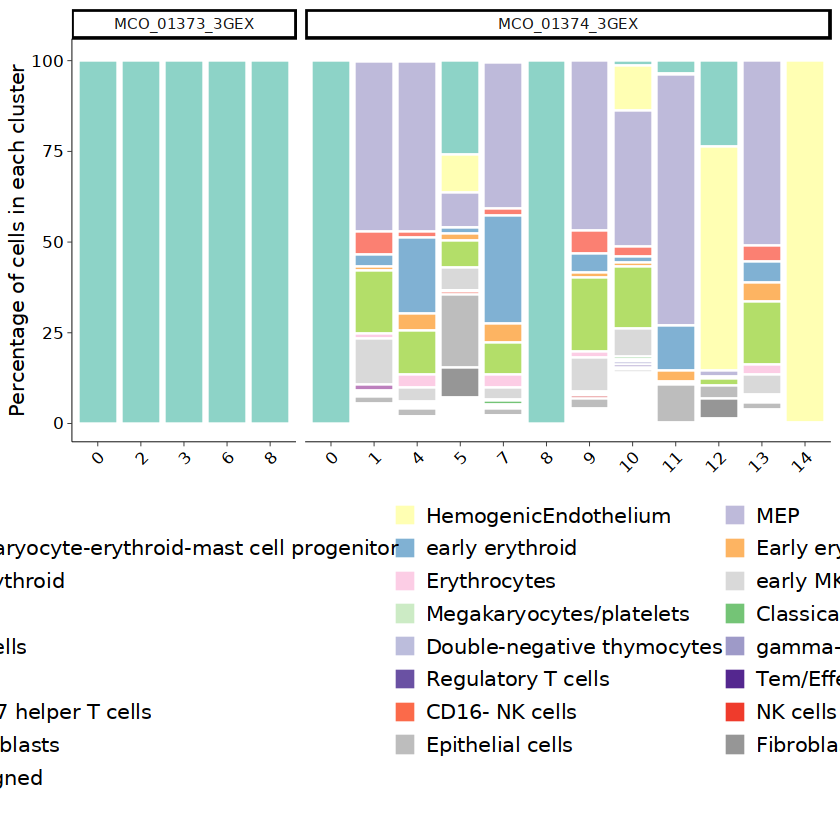

In [234]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Integrated_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors,
                      drop=F,
                      name="Integrated Annot")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=10,byrow=TRUE))



stacked_barplot
  




  

In [235]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_combined_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Dotplot

png 
  2

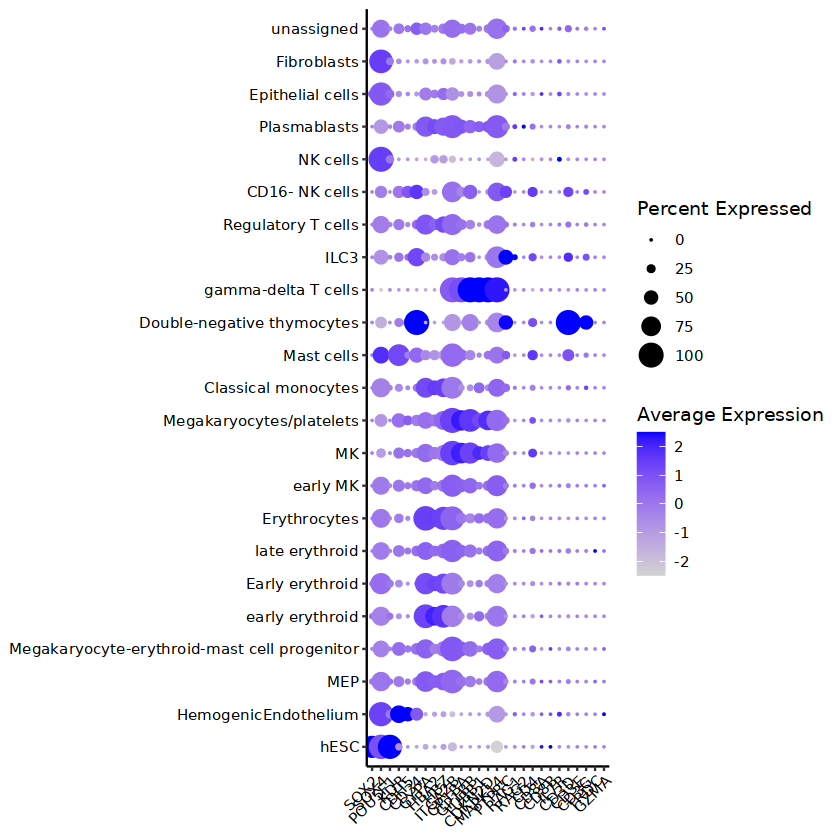

In [236]:
dotplot3<-DotPlot(
  adata_subset,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_TWO.png', width =1000)
dotplot3
dev.off()

## Decisions #8 

In [237]:
adata_subset@meta.data$Integrated_annotation<-as.character(adata_subset@meta.data$Integrated_annotation)

In [238]:
adata_subset@meta.data$Integrated_annotation[which(adata_subset@meta.data$Integrated_annotation%in%c('Megakaryocytes/platelets'))]<-'MK'
adata_subset@meta.data$Integrated_annotation[which(adata_subset@meta.data$Integrated_annotation%in%c('Early erythroid'))]<-'early erythroid'
adata_subset@meta.data$Integrated_annotation[which(adata_subset@meta.data$Integrated_annotation%in%c('Erythrocytes'))]<-'early erythroid'
adata_subset@meta.data$Integrated_annotation[which(adata_subset@meta.data$Integrated_annotation%in%c('Megakaryocyte-erythroid-mast cell progenitor'))]<-'MEP'




# Final round of decisions

In [256]:
adata_subset@meta.data$Integrated_annotation<-as.character(adata_subset@meta.data$Integrated_annotation)

## Decision #9 hESCs<- clusters('0','2','3','6','8')

In [257]:
indx.hESCs<-which(adata_subset@meta.data$seurat_clusters%in%c('0','2','3','6','8'))

str(indx.hESCs)

 int [1:17352] 1 2 3 4 5 6 7 8 9 10 ...


In [258]:
adata_subset@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #10 From FBMA and Immune LOW keep: c('MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [259]:
indx.keep<-which(adata_subset@meta.data$Integrated_annotation%in%c('hESC','HemogenicEndothelium','MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK'))

str(indx.keep)

 int [1:33056] 1 2 3 4 5 6 7 8 9 10 ...


In [260]:
adata_subset@meta.data$Integrated_annotation[-indx.keep]<-'unassigned'

In [261]:
summary(as.factor(adata_subset@meta.data$Integrated_annotation))

early erythroid             early MK HemogenicEndothelium 
                2286                 1205                 1634 
                hESC       late erythroid                  MEP 
               18224                 2219                 7348 
                  MK           unassigned 
                 140                 2164

In [262]:
adata_subset@meta.data$Integrated_annotation<-factor(adata_subset@meta.data$Integrated_annotation,
                                              c('hESC','HemogenicEndothelium','MEP','early erythroid','late erythroid','early MK','MK',                                                
                                               'unassigned'),
                                              ordered=T)

## Dotplot

png 
  2

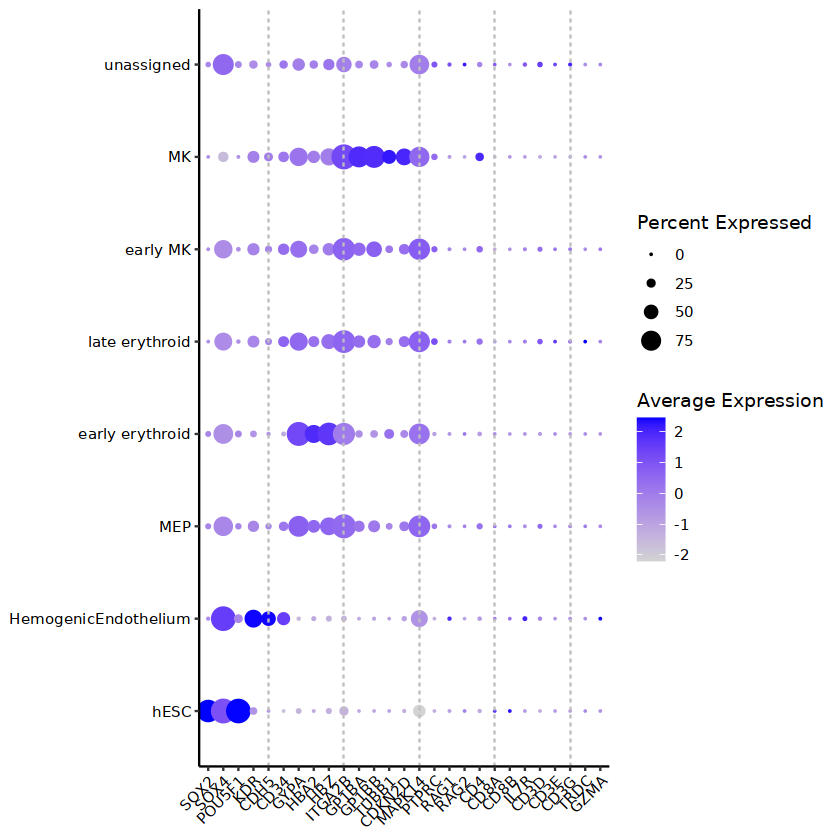

In [263]:
dotplot3<-DotPlot(
  adata_subset,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_THREE.png', width =1000)
dotplot3
dev.off()

## WNN by Integrated_annotation

In [264]:
levels(adata_subset@meta.data$Integrated_annotation)

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "late erythroid"       "early MK"            
[7] "MK"                   "unassigned"

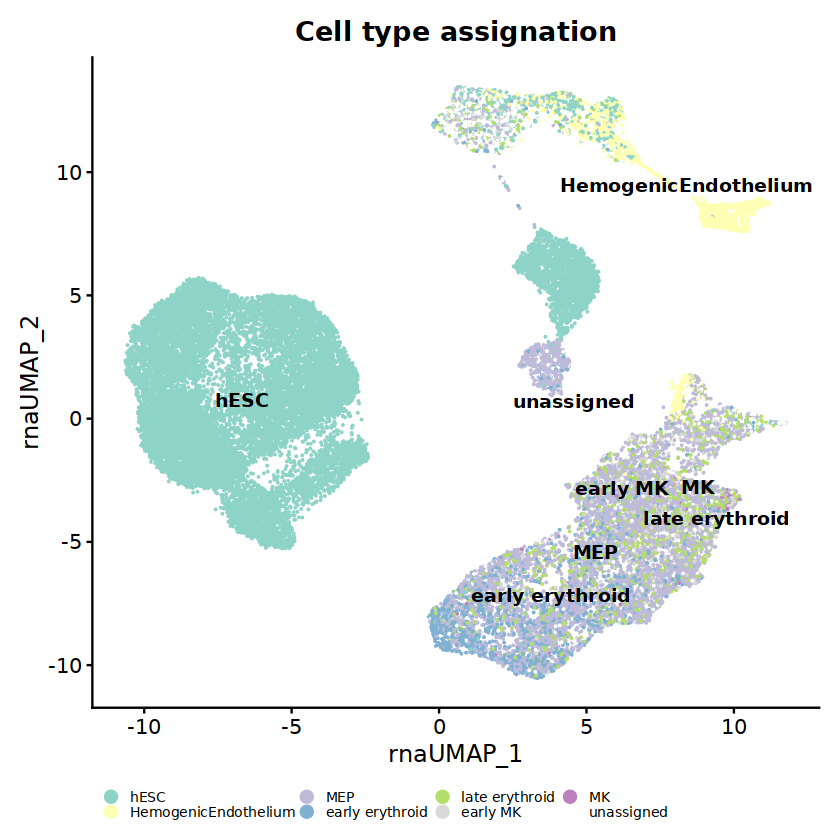

In [265]:
p3 <- DimPlot(adata_subset, reduction = "umap.rna", group.by = "Integrated_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Integrated_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3


In [267]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_Integrated_annotation.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

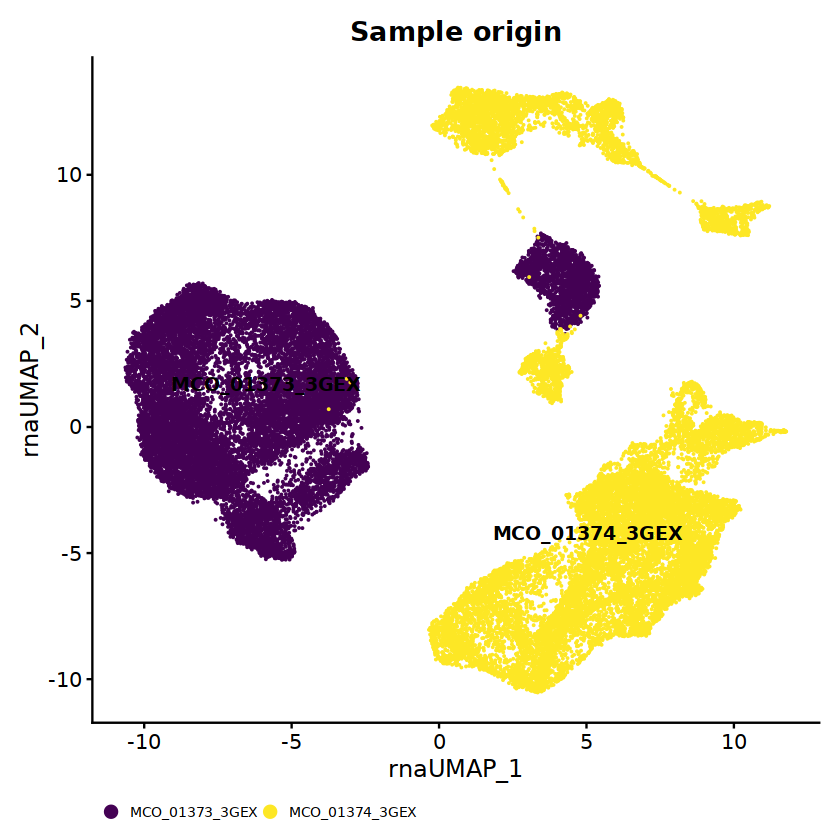

In [277]:
p3 <- DimPlot(adata_subset, reduction = "umap.rna", group.by = "orig.ident", label = FALSE) 

p3<-LabelClusters(p3, id = "orig.ident",  fontface = "bold", color = "black")+
ggtitle("Sample origin")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3


In [278]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_sample.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

# New markers

In [268]:
str(genes)

 chr [1:28997] "MIR1302-2HG" "AL627309.1" "AL627309.3" "AL627309.5" ...


In [269]:
genes[grep("CD14", genes)]

[1] "CD14"

In [270]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: GZMB, GZMK, IFNG, FCGR3A"
Warning message:
"The following requested variables were not found: GZMB, GZMK, IFNG, FCGR3A"


png 
  2

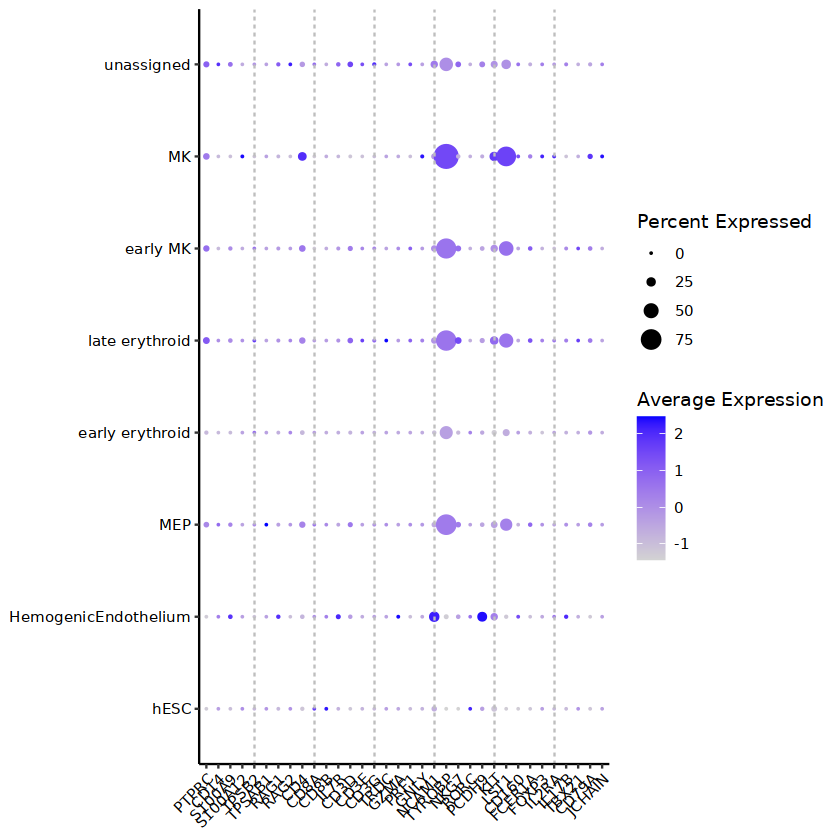

In [271]:
dotplot3<-DotPlot(
  adata_subset,
  features=new_markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: GZMB, GZMK, IFNG, FCGR3A"
Warning message:
"The following requested variables were not found: GZMB, GZMK, IFNG, FCGR3A"


png 
  2

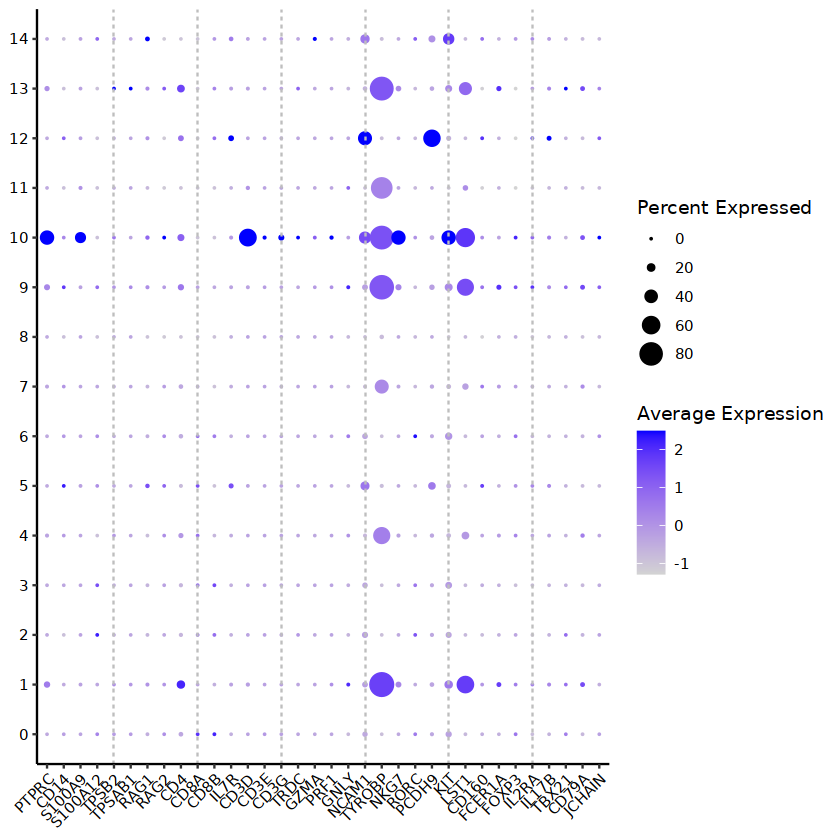

In [272]:
dotplot3<-DotPlot(
  adata_subset,
  features=new_markers,
  assay = "SCT",
    group.by="seurat_clusters")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_seurat_clusters_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

In [273]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

In [274]:
saveRDS(adata_subset, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")